<a href="https://colab.research.google.com/github/VMBoehm/DeNoPa/blob/master/ClassificationWithsNVPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive 
ROOT = "/content/gdrive"
drive.mount(ROOT, force_remount=True)

Mounted at /content/gdrive


In [0]:
%pylab inline
import pickle

Populating the interactive namespace from numpy and matplotlib


In [0]:
! pip install -q https://github.com/dfm/corner.py/archive/master.zip
import corner

     |████████████████████████████████| 8.0MB 2.7MB/s 


In [0]:
import tensorflow as tf
import tensorflow_probability as tfp
import tensorflow_hub as hub
tfd = tfp.distributions
tfb = tfp.bijectors
from tensorflow.contrib.distributions import softplus_inverse

W0606 19:16:00.994420 140492037216128 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
generator_path   = './gdrive/My Drive/InjectiveFlow/modules/decoder1/decoder'
encoder_path     = './gdrive/My Drive/InjectiveFlow/modules/encoder1/encoder'
nvp_func_path    = './gdrive/My Drive/InjectiveFlow/modules/nvp1/'
class_nvp_path   = './gdrive/My Drive/InjectiveFlow/modules/nvp_by_class/'
plot_path        = './gdrive/My Drive/InjectiveFlow/semi-supervised/plots/'
loss_path        = './gdrive/My Drive/InjectiveFlow/semi-supervised/losses/'

In [0]:
import gzip, zipfile, tarfile
import os, shutil, re, string, urllib, fnmatch
import pickle as pkl

def _download_mnist_realval(dataset):
    """
    Download the MNIST dataset if it is not present.
    :return: The train, test and validation set.
    """
    origin = (
        'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
    )
    print('Downloading data from %s' % origin)
    urllib.request.urlretrieve(origin, dataset)

def _get_datafolder_path():
    full_path = os.path.abspath('.')
    path = full_path +'/data'
    return path

def load_mnist_realval(
        dataset=_get_datafolder_path()+'/mnist_real/mnist.pkl.gz'):
    '''
    Loads the real valued MNIST dataset
    :param dataset: path to dataset file
    :return: None
    '''
    if not os.path.isfile(dataset):
        datasetfolder = os.path.dirname(dataset)
        if not os.path.exists(datasetfolder):
            os.makedirs(datasetfolder)
        _download_mnist_realval(dataset)

    f = gzip.open(dataset, 'rb')
    train_set, valid_set, test_set = pkl.load(f, encoding='latin1')
    f.close()
    x_train, targets_train = train_set[0], train_set[1]
    x_valid, targets_valid = valid_set[0], valid_set[1]
    x_test, targets_test = test_set[0], test_set[1]
    return x_train, targets_train, x_valid, targets_valid, x_test, targets_test
  
x_train, targets_train, x_valid, targets_valid, x_test, targets_test = load_mnist_realval()

In [0]:
data_dim    = 28*28
batch_size  = 16
hidden_size = 10
n_channels  = 1
label = 'class_nvp'

In [0]:
tf.reset_default_graph()

nvps          = [] 
lr            = tf.placeholder_with_default(0.001,shape=[])

encoder       = hub.Module(encoder_path, trainable=False)
decoder       = hub.Module(generator_path, trainable=False)

for ii in range(10):
  nvps+=[hub.Module(class_nvp_path+'nvp_%d/'%ii, trainable=False)]

x_tr          = tf.placeholder(shape=[batch_size,data_dim,n_channels], dtype=tf.float32)

mu            = encoder(tf.reshape(x_tr,[-1,28,28,n_channels]))

log_likes = []
for nvp in nvps:
  log_likes+=[nvp({'z_sample':mu,'sample_size':1,'u_sample':np.zeros((1, hidden_size))},as_dict=True)['log_prob']]

recon = decoder(mu)


# ---------------------------end train nvp ----------------- #

#comment train nvp above section above and uncomment this for loading the trained module



Instructions for updating:
Colocations handled automatically by placer.


W0606 19:16:02.011171 140492037216128 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:16:24.155025 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:16:25.109307 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:16:26.164165 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:16:27.798355 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:16:28.925484 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:16:30.090451 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:16:31.274683 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:16:32.478195 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:16:34.362695 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:16:35.628206 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:16:36.923879 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:16:37.626993 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

**Training of the NVP**

4932
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:16:47.930904 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:16:49.191587 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


980
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:16:56.736528 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:16:58.042579 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


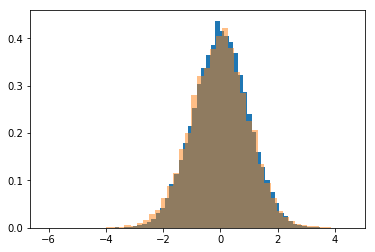

5678
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:17:05.995528 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:17:07.339092 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


1135
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:17:16.072833 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:17:18.228948 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


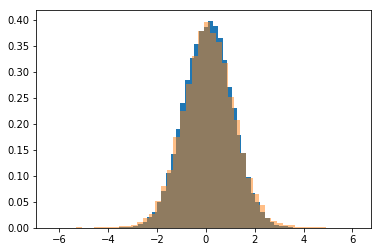

4968
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:17:27.251720 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:17:28.655621 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


1032
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:17:38.359233 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:17:39.811809 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


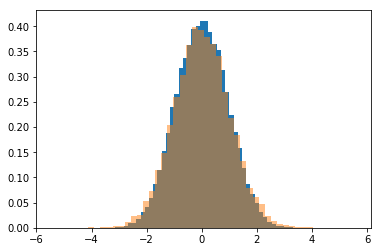

5101
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:17:50.321443 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:17:51.817844 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


1010
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:18:03.118220 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:18:04.627341 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


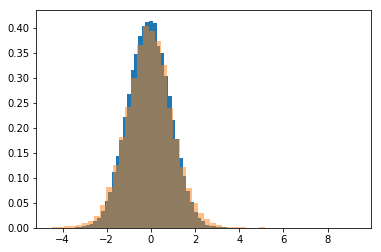

4859
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:18:16.594002 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:18:18.158792 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


982
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:18:30.932975 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:18:32.520740 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


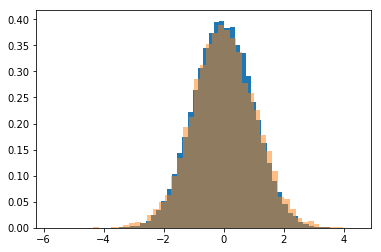

4506
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:18:45.955968 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:18:48.549436 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


892
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:19:02.798517 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:19:04.446275 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


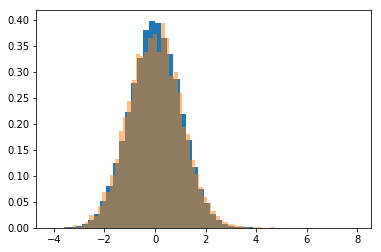

4951
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:19:19.104300 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:19:20.783445 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


958
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:19:36.594491 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:19:38.307679 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


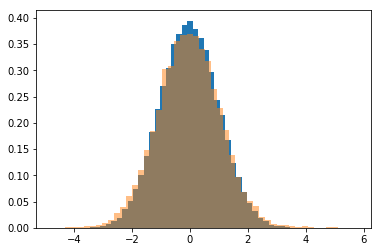

5175
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:19:54.644703 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:19:56.414274 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


1028
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:20:13.664531 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:20:15.454742 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


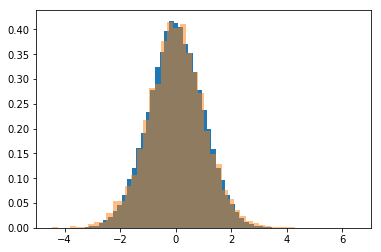

4842
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:20:33.927615 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:20:35.751058 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


974
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:20:54.766956 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:20:56.626694 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


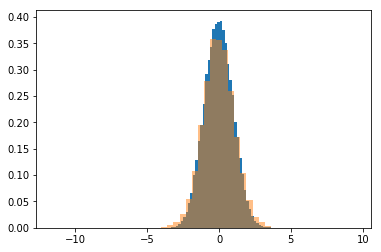

4988
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:21:17.543094 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:21:19.461063 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


1009
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:21:41.574017 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0606 19:21:44.662059 140492037216128 saver.py:1483] Saver not created because there are no variables in the graph to restore


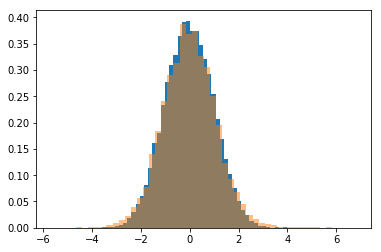

In [0]:
for data_class in range(10):
  indices = np.where(targets_train==data_class)
  x_test_class = x_train[indices]
  print(len(x_test_class))
  latent_train=sess.run(nvps[data_class]({'z_sample':encoder(tf.reshape(x_test_class,[-1,28,28,n_channels])),'sample_size':1,'u_sample':np.zeros((1,hidden_size))},as_dict=True)['bwd_pass'])

  indices = np.where(targets_test==data_class)
  x_test_class = x_test[indices]
  print(len(x_test_class))
  latent_test=sess.run(nvps[data_class]({'z_sample':encoder(tf.reshape(x_test_class,[-1,28,28,n_channels])),'sample_size':1,'u_sample':np.zeros((1,hidden_size))},as_dict=True)['bwd_pass'])
  plt.figure()
  _ = hist(latent_train.flatten(), bins=50, normed=True)
  _ = hist(latent_test.flatten(), bins=50, normed=True, alpha=0.5)
  plt.show()


In [0]:
mean_loss=[]
for ii in range(10):
  data_class = ii
  indices = np.where(targets_train==data_class)
  print(len(indices[0]))
  nvp_loss = pickle.load(open(loss_path+'class%d.pkl'%data_class,'rb'))
  mean_loss+=[np.mean(nvp_loss[::-len(indices[0])])]
print(mean_loss)
mean_loss=np.expand_dims(np.asarray(mean_loss),0)
norm=np.sum(mean_loss)
print(mean_loss/norm)



4932
5678
4968
5101
4859
4506
4951
5175
4842
4988
[14.076423, 8.646225, 16.435984, 15.783905, 15.983787, 16.792599, 14.523159, 14.322367, 15.6441965, 13.305872]
[[0.09673551 0.05941829 0.11295081 0.10846962 0.10984324 0.11540153
  0.09980556 0.09842569 0.10750952 0.09144016]]


4932
[-26.773678 -67.22111  -28.04913  -34.66547  -45.020653 -30.976381
 -27.122211 -30.292114 -28.684185 -32.422226 -45.64859  -23.978432
 -27.859161 -32.064396 -25.818787 -36.415005]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
2.490787e-06
1.2958601e-08
2.89626e-06
5.583068e-06
5.892474e-07
5.319185e-07
7.001273e-09
4.168149e-07
7.425611e-08
4.1823628e-07
6.829124e-07
3.719469e-05
1.4051923e-05
3.8380824e-07
1.2959215e-06
4.165083e-06
5678
[-42.561077 -33.747543 -17.91506  -22.55101  -36.191444 -50.806583
 -22.454582 -41.68629  -27.229216 -50.26551  -27.766825 -26.498955
 -32.456097 -25.314333 -24.73713  -29.74966 ]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
0.00071031635
0.0003873348
0.00051032787
0.020226276
0.0012118923
1.4462763e-09
0.0006353556
0.0015375811
2.312986e-06
9.443856e-08
0.001017854
0.00039113424
6.584451e-05
0.0011649382
0.0140477205
0.0022774644
4968
[ -45.368095  -31.355917  -64.68997   -56.564743  -50.815853  -32.73188
  -

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


1.4862752e-07
1.2435655e-06
4.202799e-06
5.8745655e-07
5175
[-40.575836 -20.699526 -24.319994 -23.140448 -25.00593  -25.28602
 -38.75361  -29.501677 -27.49582  -29.320103 -27.57674  -27.58437
 -36.41982  -32.78467  -31.003548 -17.210928]
[7]
[7]
[7]
[7]
[7]
[7]
[7]
[7]
[7]
[7]
[7]
[7]
[7]
[7]
[7]
[9]
2.2309594e-06
5.6553517e-08
4.0283484e-07
1.7082579e-05
1.7410018e-07
1.9895774e-06
1.8699012e-07
2.1024869e-06
3.878988e-08
1.4076454e-05
8.616921e-08
9.126521e-05
5.1039606e-06
6.344606e-07
3.239881e-07
4.7510177e-08
4842
[-55.33736  -41.69674  -73.77846  -33.44575  -42.980846 -38.323223
 -26.10749  -40.28261  -70.452774 -23.81556  -34.31529  -38.501022
 -30.006088 -30.242266 -30.97715  -56.000164]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
2.9528458e-06
6.3163325e-06
2.1821147e-06
8.8578446e-07
2.6235097e-07
6.2240592e-06
6.4918254e-07
8.064604e-06
2.0207109e-07
1.7012971e-07
3.194843e-07
7.63059e-08
9.5915304e-08
2.5356758e-07
4.9022337e-06
3.2390844e-07
4988
[-13.

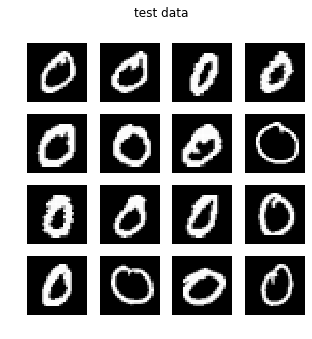

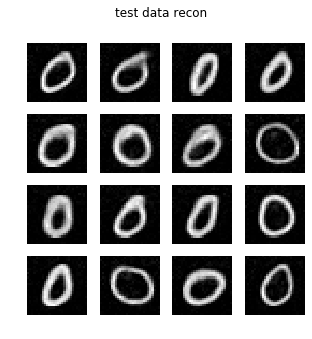

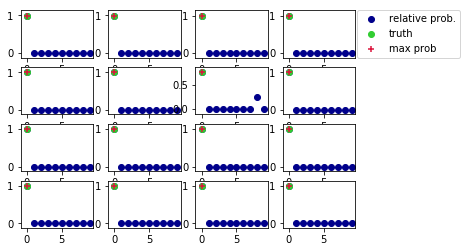

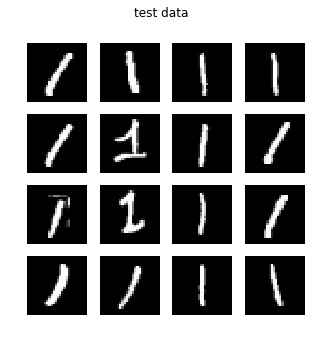

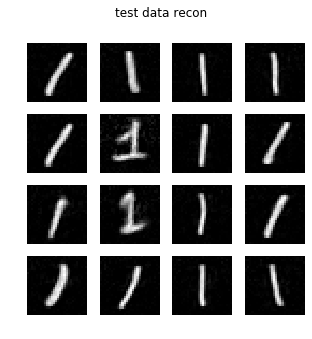

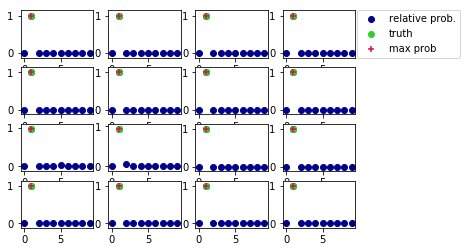

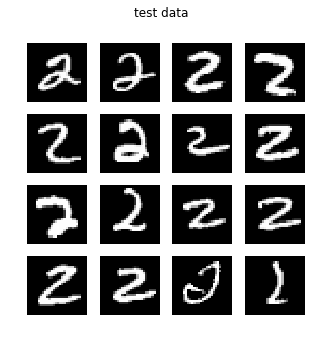

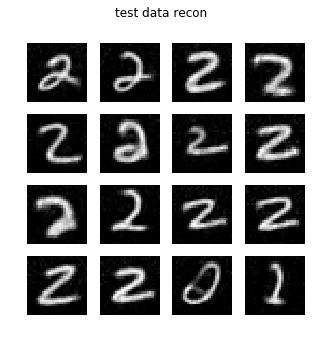

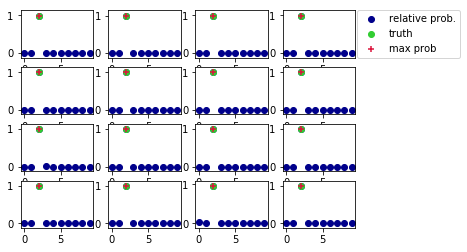

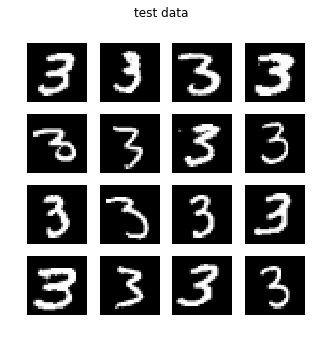

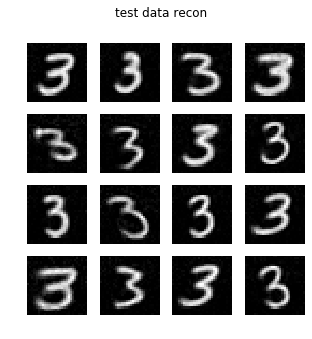

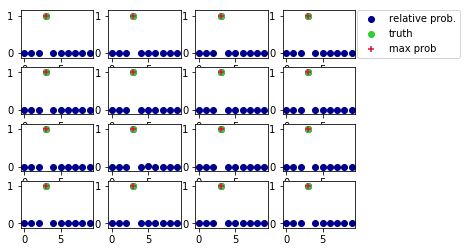

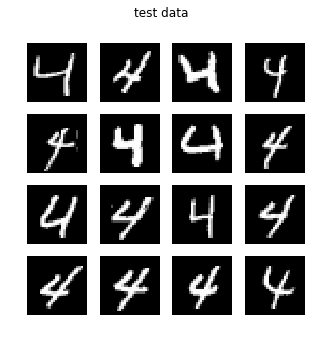

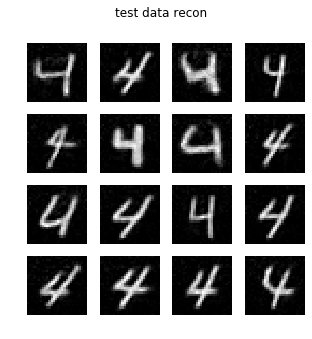

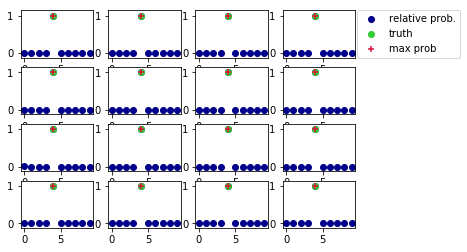

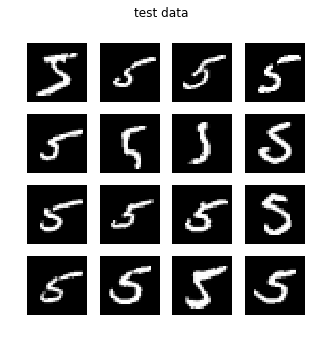

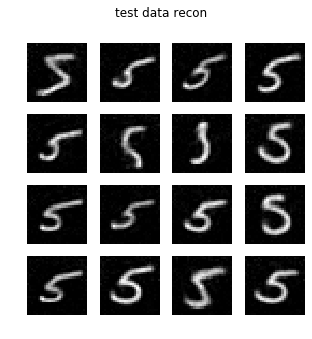

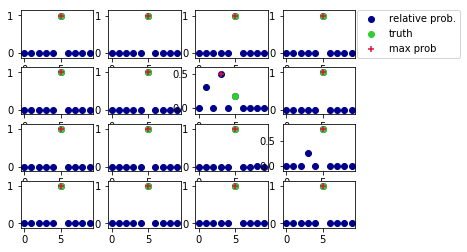

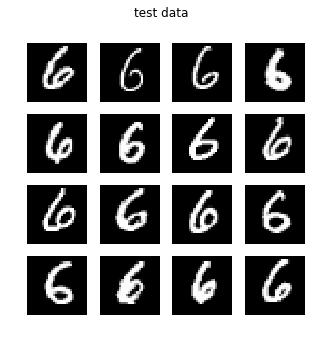

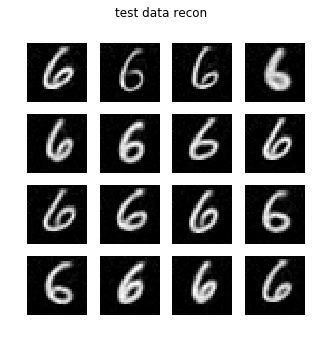

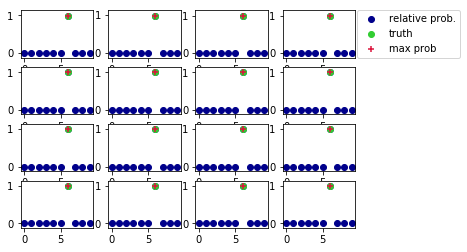

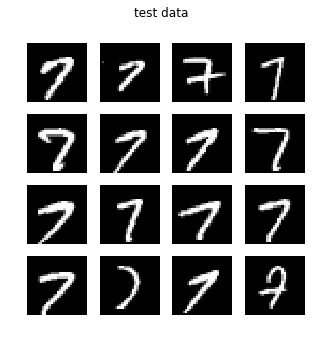

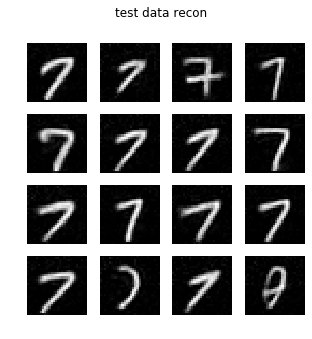

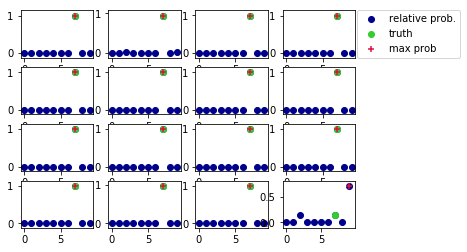

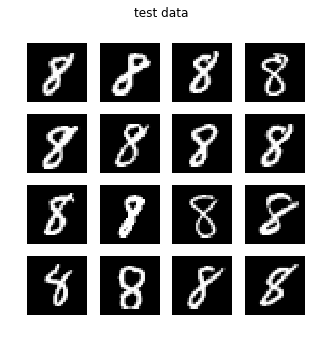

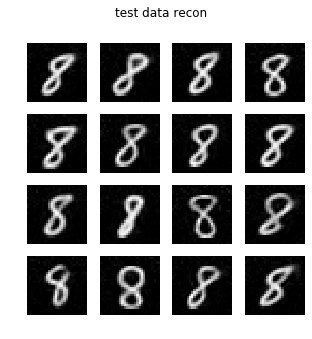

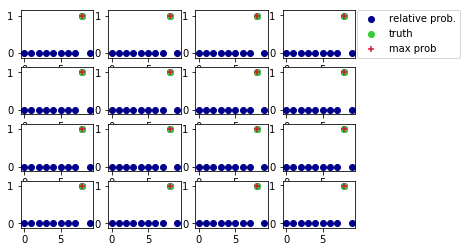

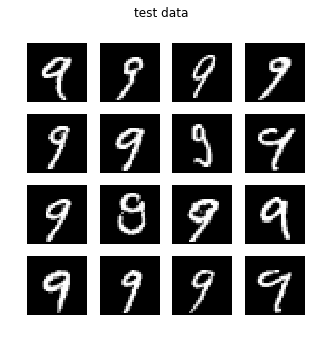

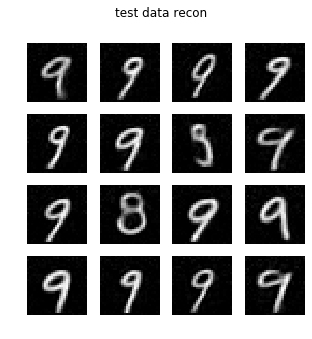

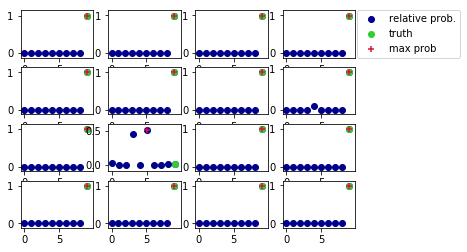

In [0]:
for data_class in range(10):
  indices = np.where(targets_train==data_class)
  x_test_class = x_train[indices]
  print(len(x_test_class))
  probs = sess.run(log_likes, feed_dict={x_tr:np.expand_dims(x_test_class[0:16],-1)})
  recons = sess.run(recon, feed_dict={x_tr:np.expand_dims(x_test_class[0:16],-1)})

  figure(figsize=(5,5))
  suptitle('test data')
  for i in range(16):
      subplot(4,4,i+1)
      imshow(np.reshape(x_test_class[i,:],(28,28)),cmap='gray',vmin=0); #colorbar()
      axis('off')
  plt.savefig(plot_path+'train_data_%d.png'%data_class, bbox_inches='tight')


  figure(figsize=(5,5))
  suptitle('test data recon')
  for i in range(16):
      subplot(4,4,i+1)
      imshow(np.reshape(recons[i,:],(28,28)),cmap='gray',vmin=0); #colorbar()
      axis('off')
  plt.savefig(plot_path+'train_data_recon%d.png'%data_class, bbox_inches='tight')  
  
  probs=np.asarray(probs)
  probs[np.where(np.isnan(probs))]=-np.inf 

  probs = probs.T#/mean_loss
  print(probs[:,-1])
  inds =[]
  for ii in range(16):
    minimum = max(probs[ii])
    ind = np.where(probs[ii]==minimum)[0]
    print(ind)
    inds+=[ind]

  plt.figure()
  for ii in range(16):
    subplot(4,4,ii+1)
    norm = np.sum(np.exp(probs[ii]))
    print(norm)
    ind=inds[ii]
    plt.scatter(np.arange(10),np.exp(probs[ii])/norm, label='relative prob.', color='darkblue')
    plt.scatter(data_class,np.exp(probs[ii][data_class])/norm, color='limegreen', label='truth')
    plt.scatter(ind,np.exp(probs[ii][ind])/norm, color='crimson',marker='+',label='max prob')
  plt.legend(loc=(1.02,3.6))
  plt.savefig(plot_path+'classification_train_%d.png'%data_class, bbox_inches='tight')

980
[-26.49031  -23.430742 -42.527897 -33.07421  -26.59351  -33.748425
 -29.286587 -27.398708 -28.70427  -26.77339  -19.04182  -24.291288
 -21.018564 -28.837133 -23.089706 -27.8581  ]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
7.8375325e-07
3.0060942e-06
6.2835876e-05
5.172383e-09
2.1358383e-06
1.6524533e-05
1.1806119e-06
9.390812e-06
1.0131383e-05
9.3714924e-08
3.120524e-05
3.4610704e-05
2.1593038e-05
1.0486995e-07
1.3038488e-06
7.387916e-06
1135
[-29.904104 -28.966671 -31.61481  -31.709435 -21.07602  -23.316414
 -28.790184 -22.553339 -66.91701  -27.623676 -24.798162 -42.486813
 -54.77353  -22.698755 -46.566044 -34.89437 ]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
0.007797397
0.006673021
6.880331e-05
0.00028518637
0.021230595
0.0031472072
3.6780733e-05
0.0012193468
4.9120865e-07
0.00086405245
8.308912e-05
1.7010304e-06
3.279769e-08
0.004592717
2.2261474e-06
1.13897495e-05
1032
[-89.529434 -45.431297 -36.4355   -35.09749  -53.83308  -33.78002


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


2.2737737e-07
7.530866e-08
7.7391775e-07
4.4660337e-07
2.4790284e-05
1028
[ -27.17316   -29.442091  -18.730354  -38.195534  -30.095371  -18.550205
  -60.213413  -50.283756  -31.984135  -66.1249    -48.035625  -23.839163
  -24.848854  -37.03248  -207.89972   -28.937807]
[7]
[7]
[7]
[7]
[7]
[7]
[7]
[7]
[7]
[7]
[7]
[7]
[7]
[7]
[7]
[7]
2.1615122e-05
1.9526671e-05
8.877141e-06
7.912103e-08
1.3204891e-06
6.174748e-06
1.18534174e-07
2.508525e-13
2.8262054e-06
1.06451026e-07
3.0992533e-07
3.6251464e-07
8.707443e-06
1.9359434e-06
4.2283576e-11
9.710446e-07
974
[-57.915176 -36.341427 -74.762024 -65.07777  -41.24095  -36.636032
 -34.76471  -48.27437  -60.186302 -34.70509  -35.286087 -66.422
 -49.457294 -32.38899  -48.154823 -33.114098]
[2]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
[8]
2.702221e-08
2.891117e-08
3.27298e-06
9.41834e-10
1.0243078e-06
1.6486075e-07
1.1353825e-06
2.363382e-09
2.5387166e-07
3.660485e-07
2.1298052e-07
3.5976143e-08
9.377889e-09
1.8932907e-07
6.432112e-08
8

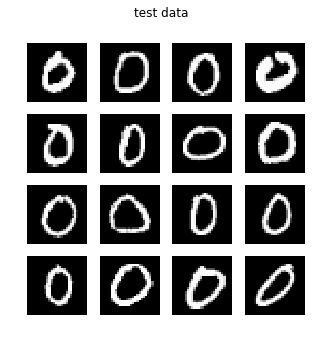

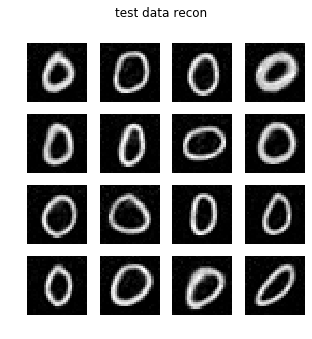

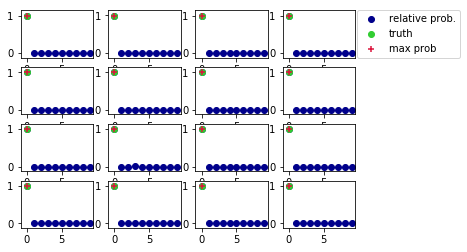

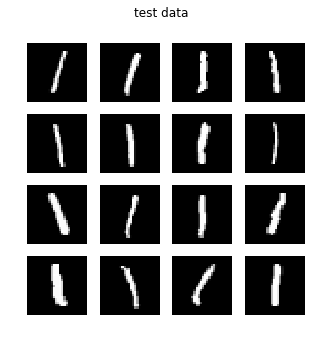

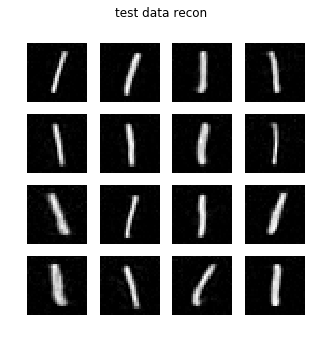

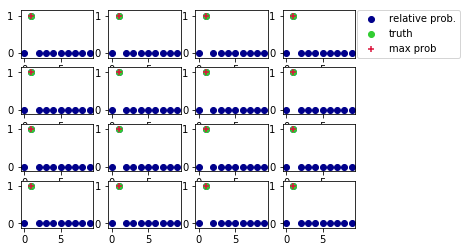

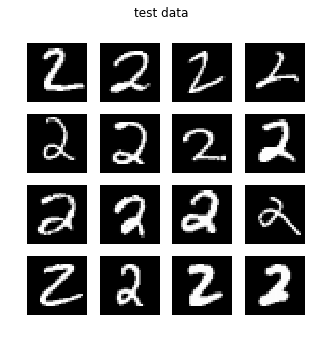

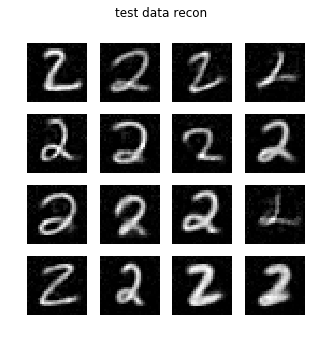

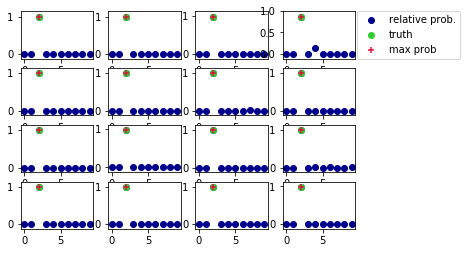

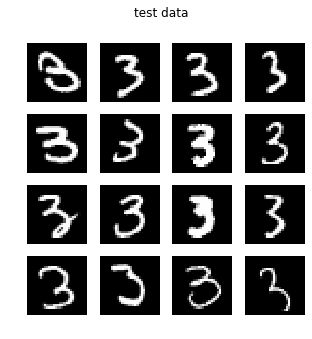

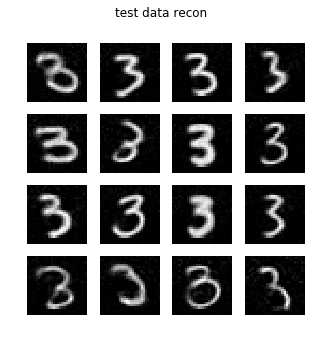

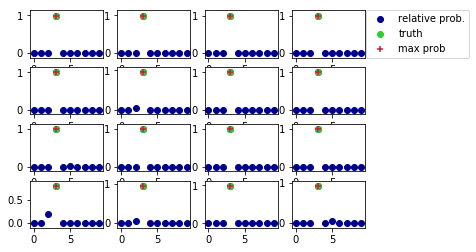

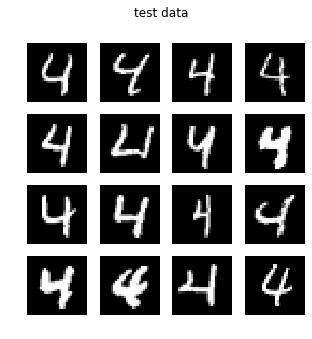

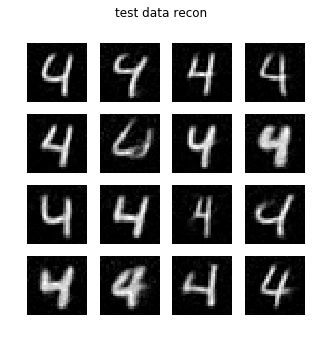

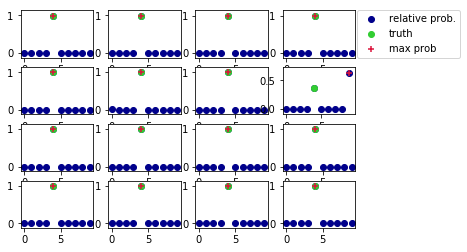

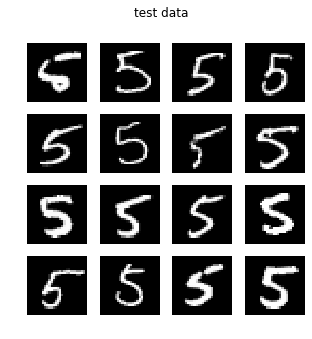

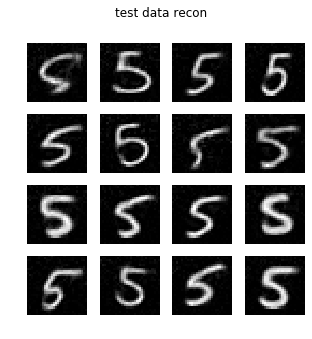

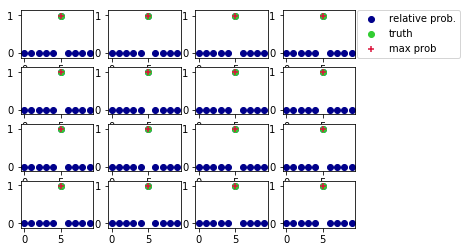

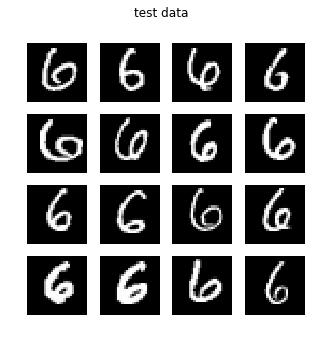

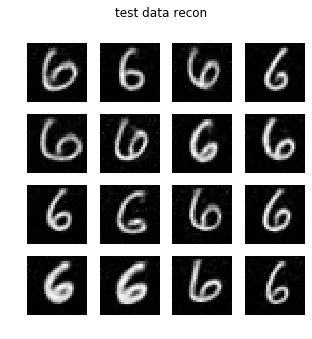

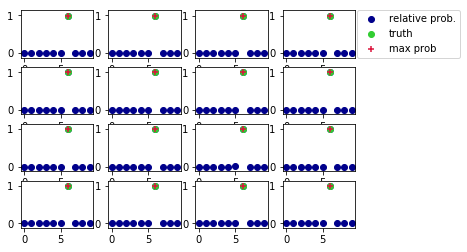

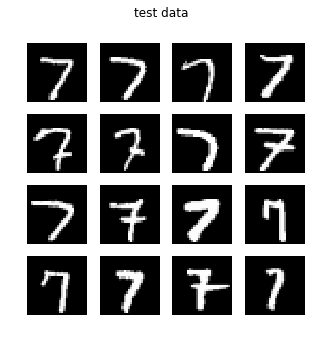

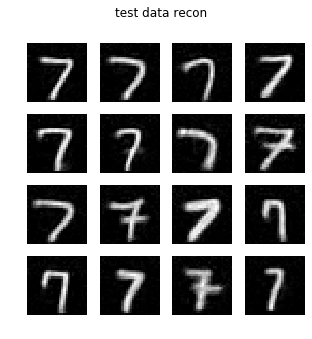

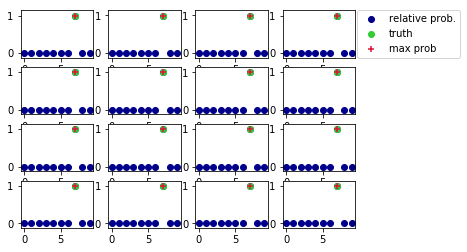

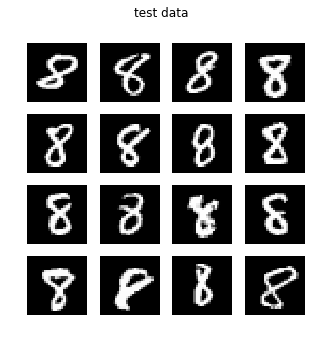

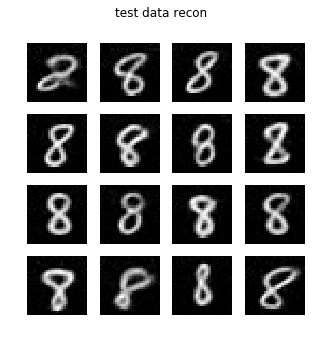

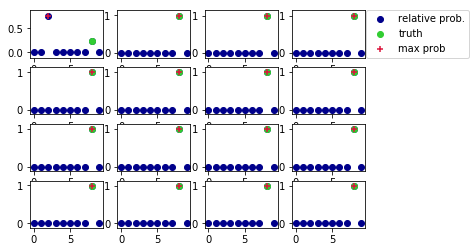

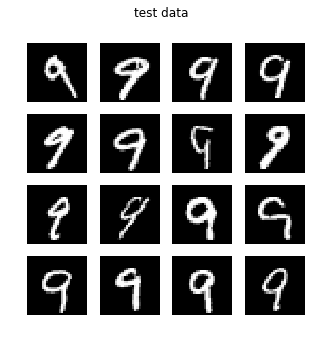

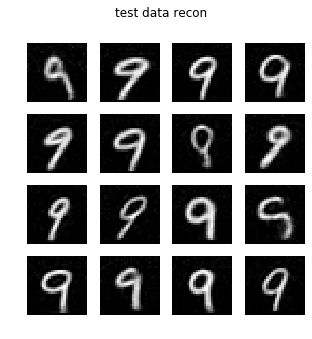

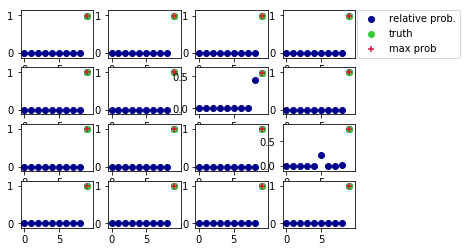

In [0]:
for data_class in range(10):
  indices = np.where(targets_test==data_class)
  x_test_class = x_test[indices]
  print(len(x_test_class))
  probs = sess.run(log_likes, feed_dict={x_tr:np.expand_dims(x_test_class[0:16],-1)})
  recons = sess.run(recon, feed_dict={x_tr:np.expand_dims(x_test_class[0:16],-1)})

  figure(figsize=(5,5))
  suptitle('test data')
  for i in range(16):
      subplot(4,4,i+1)
      imshow(np.reshape(x_test_class[i,:],(28,28)),cmap='gray',vmin=0); #colorbar()
      axis('off')
  plt.savefig(plot_path+'test_data_%d.png'%data_class, bbox_inches='tight')


  figure(figsize=(5,5))
  suptitle('test data recon')
  for i in range(16):
      subplot(4,4,i+1)
      imshow(np.reshape(recons[i,:],(28,28)),cmap='gray',vmin=0); #colorbar()
      axis('off')
  plt.savefig(plot_path+'test_data_recon%d.png'%data_class, bbox_inches='tight')  
  
  probs=np.asarray(probs)
  probs[np.where(np.isnan(probs))]=-np.inf 

  probs = probs.T#/mean_loss
  print(probs[:,-1])
  inds =[]
  for ii in range(16):
    minimum = max(probs[ii])
    ind = np.where(probs[ii]==minimum)[0]
    print(ind)
    inds+=[ind]

  plt.figure()
  for ii in range(16):
    subplot(4,4,ii+1)
    norm = np.sum(np.exp(probs[ii]))
    print(norm)
    ind=inds[ii]
    plt.scatter(np.arange(10),np.exp(probs[ii])/norm, label='relative prob.', color='darkblue')
    plt.scatter(data_class,np.exp(probs[ii][data_class])/norm, color='limegreen', label='truth')
    plt.scatter(ind,np.exp(probs[ii][ind])/norm, color='crimson',marker='+',label='max prob')
  plt.legend(loc=(1.02,3.6))
  plt.savefig(plot_path+'classification_test_%dpng'%data_class, bbox_inches='tight')

In [0]:
accs_test=[]
for data_class in range(10):
  indices = np.where(targets_test==data_class)
  x_test_class = x_test[indices]
  num = len(x_test_class)//16
  
  probs=[]
  for ii in range(num):
    probs.append(sess.run(log_likes, feed_dict={x_tr:np.expand_dims(x_test_class[ii*16:(ii+1)*16],-1)}))
  probs=np.asarray(probs)
  probs=np.swapaxes(probs,1,2)
  probs=probs.reshape((-1,10))
  
  trues=0
  for ii in range(len(probs)):
    minimum = max(probs[ii])
    ind = np.where(probs[ii]==minimum)[0]
    if ind ==data_class:
      trues+=1
  acc= trues/len(probs)
  print(acc)
  accs_test.append(acc)
  
accs_train=[]
for data_class in range(10):
  indices = np.where(targets_train==data_class)
  x_test_class = x_train[indices]
  num = len(x_test_class)//16
  
  probs=[]
  for ii in range(num):
    probs.append(sess.run(log_likes, feed_dict={x_tr:np.expand_dims(x_test_class[ii*16:(ii+1)*16],-1)}))
  probs=np.asarray(probs)
  probs=np.swapaxes(probs,1,2)
  probs=probs.reshape((-1,10))
  
  trues=0
  for ii in range(len(probs)):
    minimum = max(probs[ii])
    ind = np.where(probs[ii]==minimum)[0]
    if ind ==data_class:
      trues+=1
  acc= trues/len(probs)
  print(acc)
  accs_train.append(acc)

0.9825819672131147
0.98125
0.978515625
0.9523809523809523
0.9784836065573771
0.9727272727272728
0.9798728813559322
0.9677734375
0.9583333333333334
0.9434523809523809
0.9961444805194806
0.9938206214689266
0.9943548387096774
0.9825078616352201
0.9946369636963697
0.9891014234875445
0.9965614886731392
0.9895510835913313
0.9917218543046358
0.9895498392282959


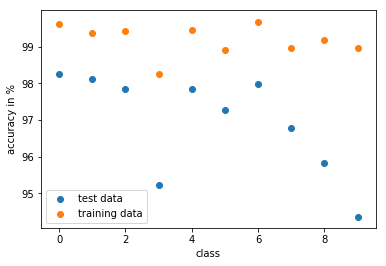

In [0]:
plt.figure()
plt.scatter(np.arange(10),np.asarray(accs_test)*100, label='test data')
plt.scatter(np.arange(10),np.asarray(accs_train)*100,label='training data')
plt.ylabel('accuracy in %')
plt.xlabel('class')
plt.legend()